In [1]:
import sys
sys.path.insert(1, '/Users/ethanfuerst/Documents/Coding/nba-figures')
from nba_season import NBASeason
import pandas as pd
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
# run before the games on 1/23/21

In [2]:
data = []
columns = ['season', 'num_games', 'pts_spread',
    'pts_list', 'pts_sd', 
    '3_m', '3_a', 
    '2_m', '2_a',
    'ft_m', 'ft_a',
    'mov', 'mov_sd'
    ]

for i in range(2000, 2021):
    seas = NBASeason(i)
    df = seas.game_log
    df = df[df['MIN'] >= 240].copy()
    
    made_3s = df['FG3M'].sum()
    att_3s = df['FG3A'].sum()
    plus_minus = df[df['PLUS_MINUS'] > 0]['PLUS_MINUS']

    row = [i, len(df), df['PTS'].max() - df['PTS'].min(),
        df['PTS'].values, df['PTS'].std(), 
        made_3s, att_3s, 
        df['FGM'].sum() - made_3s, df['FGA'].sum() - att_3s,
        df['FTM'].sum(), df['FTA'].sum(),
        plus_minus.values, plus_minus.std()
    ]
    data.append(row)

df = pd.DataFrame(
    data=data,
    columns=columns
)
df['3s_a_pg'] = df['3_a'] / df['num_games']
df['2s_a_pg'] = df['2_a'] / df['num_games']
df['3pt%'] = round((df['3_m'] / df['3_a']) * 100, 2)
df['tot_shots'] = df['3_a'] + df['2_a']
df['3_prop_of_total'] = round((df['3_a'] / df['tot_shots']) * 100, 2)
df['2_prop_of_total'] = round((df['2_a'] / df['tot_shots']) * 100, 2)
df['ft_per_fga'] = df['ft_a'] / df['tot_shots']


In [3]:
def compare_stats(data, stat1, stat1_name, stat2, stat2_name, title, stat1_ylim=None, stat2_ylim=None, corr=False):
    fig = plt.figure()
    fig.patch.set_facecolor('#E4E4E4')
    ax1 = fig.add_subplot(111)
    ax1.patch.set_facecolor('#E4E4E4')
    ax1.set_xlabel('Season')
    ax1.set_ylabel(stat1_name)
    l1 = ax1.plot(data['season'], data[stat1], '#1C3666', label=stat1_name, linewidth=3)
    ax1.tick_params(axis='y')
    if stat1_ylim is not None:
        ax1.set_ylim(stat1_ylim)

    ax2 = ax1.twinx()

    ax2.set_ylabel(stat2_name) 
    ax2.patch.set_facecolor('#E4E4E4')
    l2 = ax2.plot(data['season'], data[stat2], '#F58426', label=stat2_name, linewidth=3)
    ax2.tick_params(axis='y')
    if stat2_ylim is not None:
        ax2.set_ylim(stat2_ylim)

    if corr:
        ax1.text(0.5, 0.95, f'r = {round(scipy.stats.pearsonr(data[stat1].values, data[stat2].values)[0], 3)}', 
            transform=ax1.transAxes, fontsize=14,
            verticalalignment='center', horizontalalignment='center')

    lns = l1 + l2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='center', framealpha=0.2, bbox_to_anchor=(.5, -.2))
    fig.set_size_inches(8,5, forward=True)
    plt.title(title, size=18)
    plt.xticks([i for i in range(2000, 2021, 2)])
    plt.show()


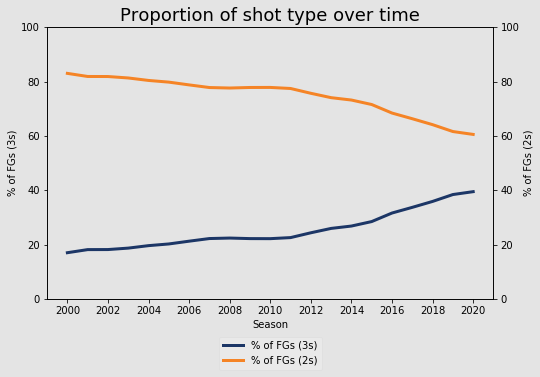

In [4]:
# fig1
compare_stats(df, '3_prop_of_total', '% of FGs (3s)', 
    '2_prop_of_total', '% of FGs (2s)', 
    'Proportion of shot type over time', 
    stat1_ylim=[0, 100], stat2_ylim=[0, 100])



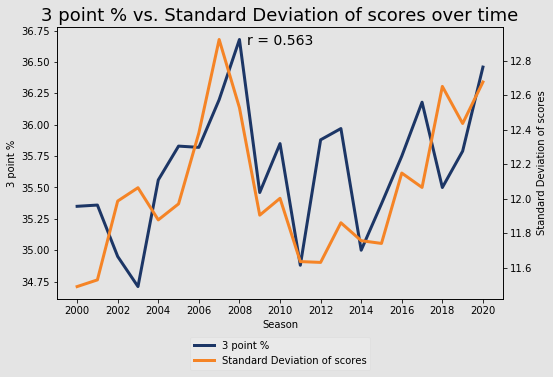

In [5]:
# fig2
compare_stats(df, '3pt%', '3 point %', 
    'pts_sd', 'Standard Deviation of scores',
    '3 point % vs. Standard Deviation of scores over time', corr=True)


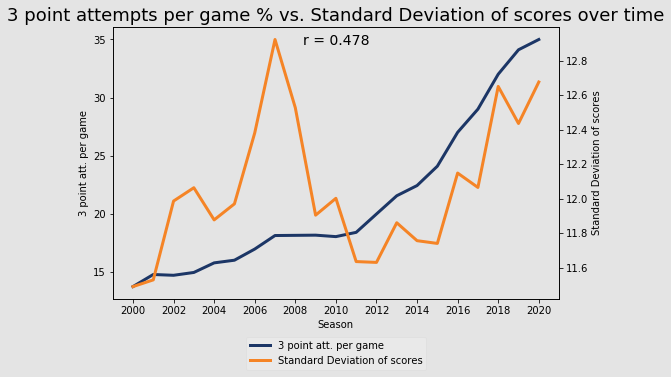

In [6]:
# fig 3
compare_stats(df, '3s_a_pg', '3 point att. per game', 
    'pts_sd', 'Standard Deviation of scores',
    '3 point attempts per game % vs. Standard Deviation of scores over time',
    corr=True)


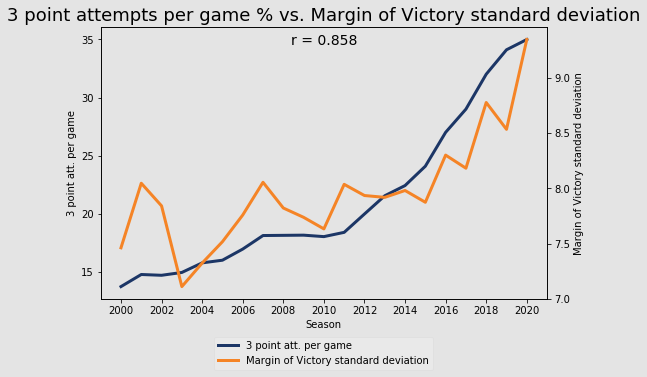

In [7]:
# fig 4
compare_stats(df, '3s_a_pg', '3 point att. per game', 
    'mov_sd', 'Margin of Victory standard deviation', 
    '3 point attempts per game % vs. Margin of Victory standard deviation', 
    corr=True)


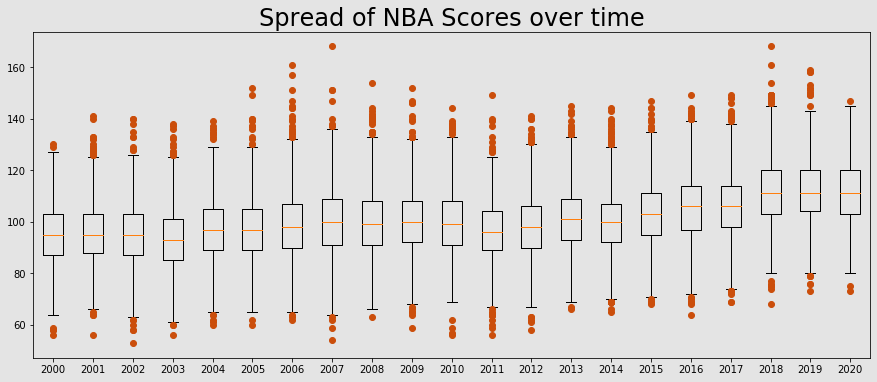

In [8]:
# fig 5
boxplots_fig = plt.figure()
ax = boxplots_fig.add_subplot(111)
boxplots_fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
plt.boxplot(
    x=df['pts_list'],
    labels=df['season'],
    sym='#CB4E0B'
)
boxplots_fig.set_size_inches(15,6, forward=True)
plt.title('Spread of NBA Scores over time', size=24)

plt.show()


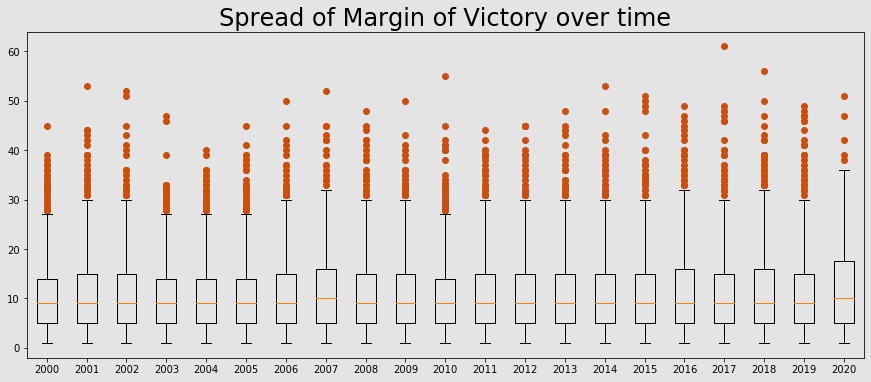

In [9]:
# fig 6
boxplots_fig = plt.figure()
ax = boxplots_fig.add_subplot(111)
boxplots_fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
plt.boxplot(
    x=df['mov'],
    labels=df['season'],
    sym='#CB4E0B'
)
boxplots_fig.set_size_inches(15,6, forward=True)
plt.title('Spread of Margin of Victory over time', size=24)

plt.show()
